In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("housing.csv")
# df

In [3]:
df['income_cat'] = pd.cut(df['median_income'], bins =[0, 1.5, 3 , 4.5, 6, np.inf], labels=[1,2,3,4,5])

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [7]:
# Lets remove the income_cat column
for sett in (strat_train_set, strat_test_set):
    sett.drop("income_cat",axis=1, inplace = True)

In [9]:
df = strat_train_set.copy()

<Axes: xlabel='latitude', ylabel='longitude'>

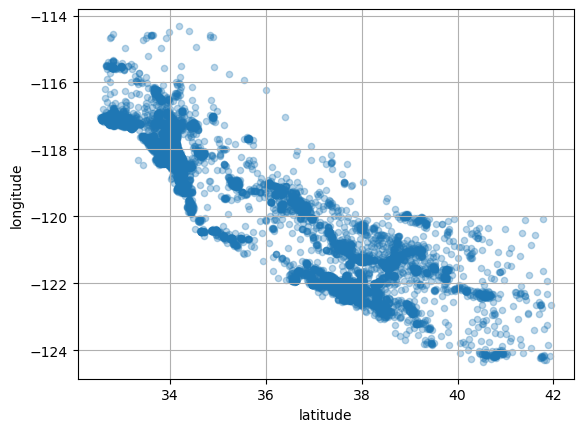

In [12]:
df.plot(kind="scatter", x = "latitude", y = "longitude", grid = True, alpha =0.3)

<Axes: xlabel='latitude', ylabel='longitude'>

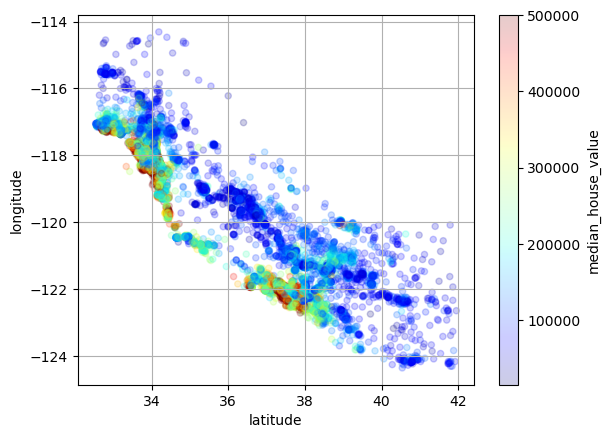

In [14]:
df.plot(kind="scatter", x = "latitude", y = "longitude", grid = True, alpha =0.2, cmap ="jet", c = "median_house_value")

In [15]:
df.drop(labels = "ocean_proximity", inplace = True, axis = 1) # axis is for as here col is being removed
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


array([[<Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='median_house_value', ylabel='housing_median_age'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='median_house_value', ylabel='median_income'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='median_house_value', ylabel='median_house_value'>]],
      dtype=object)

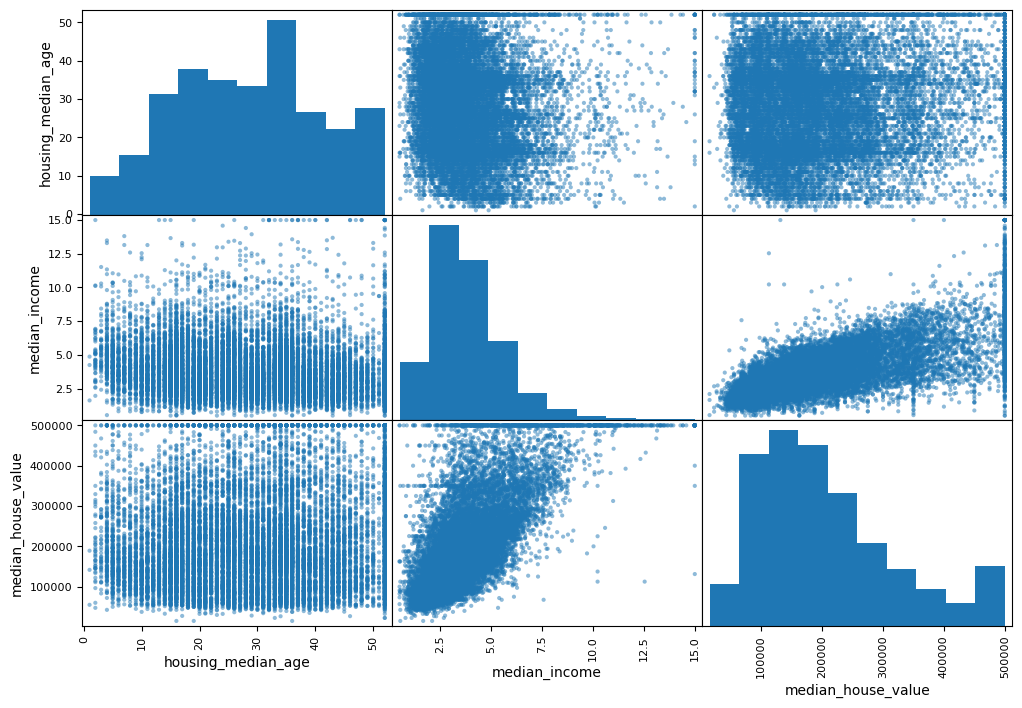

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["housing_median_age", "median_income","median_house_value"]
scatter_matrix(df[attributes], figsize=(12,8))